<div style="border:solid green 2px; padding: 20px">
    
<b>Али, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в **слаке**, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> К сожалению, у меня нет твоего слака 😅😅😅</div>
    
    
---

# Дипломный проект - Анализ оттока клиентов банка

# **Описание проектa**

В «Метанпромбанк» требуется аналитик, уверенно владеющий Python. Нашими главными задачами станут анализ оттока клиентов и сегментирование пользователей банка. Сегментация покажет, как клиенты пользуются нашими услугами.

# Цель проекта

- Проведение исследовательского анализа, определение всех значимых признаков отточности (сравнение портретов типичных клиентов, которые склонны и не склонны уходить из банка)

- Формулировка и проверка статистических гипотез

- Объединяя признаки отточности, формируем сегменты, отбираем из них лучшие и даем по ним рекомендации

# **Входные данные**

`/datasets/bank_scrooge.csv`

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

`USERID` — идентификатор пользователя,

`score` — баллы кредитного скоринга,

`city` — город,

`gender` — пол,

`age` — возраст,

`equity` — количество баллов собственности

`balance` — баланс на счёте,

`products` — количество продуктов, которыми пользуется клиент,

`credit_card` — есть ли кредитная карта,

`last_activity` — активный клиент,

`EST_SALARY` — оценочный доход клиента,

`сhurn` — признак оттока.

# Ход исследования

- Загрузка и описание данных
- Подготовка данных
  - Анализ пропусков и их обработка
  - Кодирование данных для корреляционного анализа
- Исследовательский анализ данных (EDA)
  - Анализ распределений признаков, включая разбиение по оттоку
  - Корреляционный анализ с интерпретацией
- Проверка гипотез
  - Формулировка как минимум двух гипотез
  - Обоснование выбранных методов проверки
- Промежуточные выводы по результатам EDA и гипотез
- Сегментация
  - Разбиение на крупные сегменты
  - Приоритизация сегментов для маркетингового анализа
- Рекомендации по управлению сегментами

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и основные этапы перед началом проекта

## Загрузка и подготовка данных

In [ ]:
!pip install phik

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy import stats
import math
import phik
from phik.report import plot_correlation_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# чтение файлов с данными и сохранение в df
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('/datasets/bank_scrooge.csv')

In [ ]:
data.sample(10)

In [ ]:
# выведем информацию по датасету
data.info()

In [ ]:
# выведем информацию по числовым значениям
data.describe()

In [ ]:
# приведем названия к нижнему регистру, изменим названия на более удобные
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid' : 'user_id', 'EST_SALARY' : 'est_salary'})

In [ ]:
# проверка отсутствия пропущенных значений в данных
missing_data = data.isnull().sum()

In [ ]:
# aнализ пропущенных значений (классификация MCAR, MAR, MNAR)
# далее мы создаем двоичные функции, которые указывают, отсутствует ли значение
missing_indicators = data.isnull().astype(int)

In [ ]:
# расчет центральных тенденций для отсутствующих и неотсутствующих групп
summary_stats = pd.DataFrame()

# для непрерывных переменных рассчитаем среднее значение, медиану и моду, где это необходимо.
for col in ['balance', 'age', 'est_salary', 'products']:
    summary_stats[col] = [
        data[col].mean(),
        data[col].median(),
        data[col].mode()[0] if not data[col].mode().empty else None
    ]

In [ ]:
# при необходимости кодирование категориальных переменных (например, пол, город)
# кодирование «пола» и «города» с помощью горячей кодировки с сохранением исходных столбцов
encoded_data = pd.get_dummies(data, columns=['gender', 'city'], drop_first=True)
encoded_data

In [ ]:
# проверка дубликатов user_id и их проверка
duplicate_users = data[data.duplicated(subset='user_id', keep=False)]

missing_data, summary_stats, duplicate_users.head()

Имеются пропуски в столбцах `age` (26) пропусков и по полю `balance` (2295).
Также, были созданы индикаторы пропусков, чтобы проанализировать зависимости пропусков от других данных.
Рассчитаны среднее, медиана и мода для непрерывных признаков:
`balance`, `age`, `est_salary`, и `products`.
Столбцы `gender` и `city` закодированы с использованием one-hot кодирования,
и было найдено небольшое количество дубликатов по столбцу `user_id`

In [ ]:
# удалим пропуски по возрастному полю 
data = data.dropna(subset=['age'])

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Замена на медиану смещает распредление данных, в данном проекте их мало, поэтому можно удалить

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Удалил пропуски по столбцу с возрастом клиентов
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

С возрастом корректно - за малочисленностью можно смело отбросить.
:

In [ ]:
# удалим дубликаты по полю идентификатора пользователя (user_id) 
data.drop_duplicates(subset='user_id', keep='first', inplace=True)

**Вывод**

По итогам проверки и подготовки данных:

 - Пропуски наблюдаются только в двух столбцых: `age` (26 пропусков) и `balance` (2295 пропусков). Остальные признаки не содержат пропусков, что говорит о достаточно хорошем качестве данных.
 - Среднее значение баланса составляет примерно 827.794, медиана — 524.272, а мода — 0. Это указывает на то, что есть значительное количество клиентов с нулевым балансом
 - Средний возраст клиентов — около 42 лет, что вполне ожидаемо для целевой группы банков.
 - Средняя заработная плата составляет около 147.867, что говорит о стабильном уровне дохода клиентов.
 - В среднем клиенты используют 1.87 банковских продуктов, что близко к 2.
 - Пропуски в возрасте были удалены. Это сделано потому, что в данном столбце небольшое количество пропусков и они не повлияют на дальнейший анализ.
 - Пропуски в столбце `balance`: Пропуски в балансе были нетронуты, ибо они могут быть связаны с реальными причинами — например, отсутствие активных операций на счете
 - Также, были удалены дубликаты строк на основе идентификатора пользователя (`user_id`).

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Хорошо бы проверить на тип пропусков

## EDA

### Aнализ распределения признаков

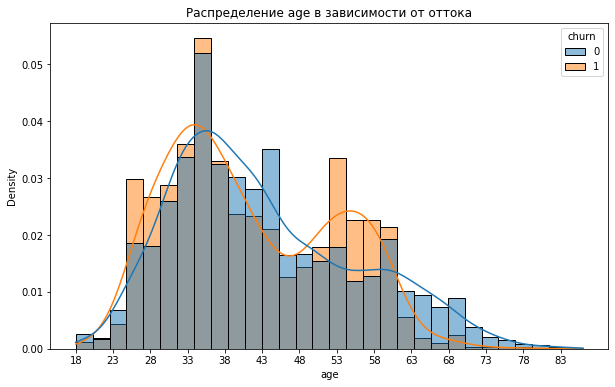

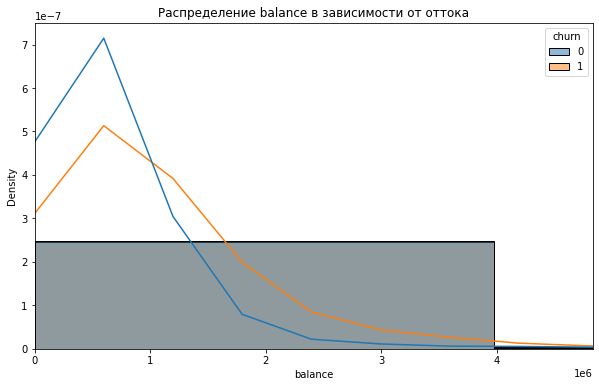

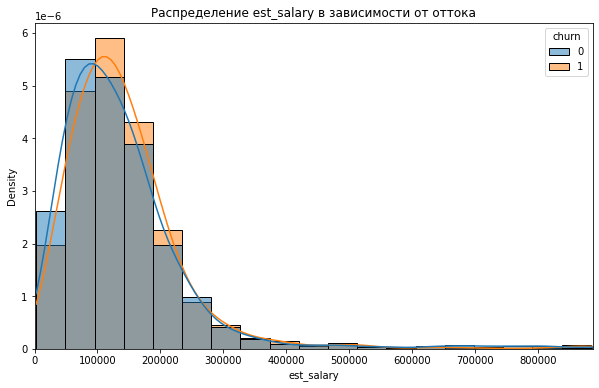

In [15]:
# определяем непрерывные признаки
continuous_features = ['age', 'balance', 'est_salary']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='churn', stat='density', common_norm=False, bins=30, kde=True)
    plt.title(f'Распределение {feature} в зависимости от оттока')
    
    # целочисленные корзины для возраста
    if feature == 'age':
        plt.xticks(range(int(data['age'].min()), int(data['age'].max()) + 1, 5))
    
    # ограничения xlim для баланса и зарплаты
    if feature in ['balance', 'est_salary']:
        plt.xlim(0, data[feature].quantile(0.99))  # ограничим до 99-го перцентиля
    
    plt.show()

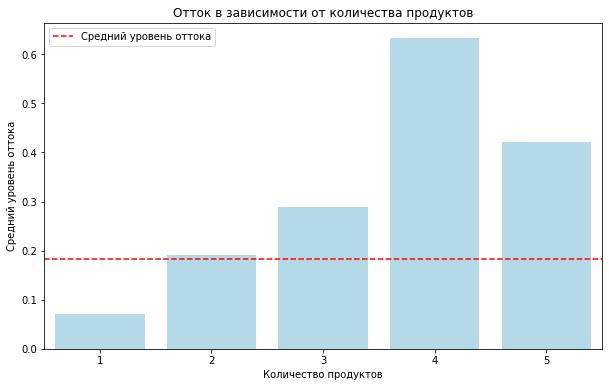

In [16]:
# проверка на аномальные значения
if data['products'].min() == 0:
    data = data[data['products'] > 0]  # исключаем строки, где products = 0

# график для products с единой цветовой гаммой для гармоничности 
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data, 
    x='products', 
    y='churn', 
    ci=None, 
    color='skyblue', 
    alpha=0.7
)
plt.axhline(y=data['churn'].mean(), color='red', linestyle='--', label='Средний уровень оттока')
plt.title('Отток в зависимости от количества продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Средний уровень оттока')
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут несколько моментов, на которые стоит обратить внимание:    
    
1. Некорректны корзины возраста (они нецелочисленные и на графике возникают провалы)

2. Баланс-зарплата нужно сделать `xlim`.
3. Дискретные продукты через  барплот и акслайн со средним уровнем оттока.
4. Ноль продуктов - аномалия, предлагаю подумать, все ли значения адекватны
    


<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Вроде исправил, но не обошлось без помощи ИИ 🥲
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Лучше с помощью гугла)))

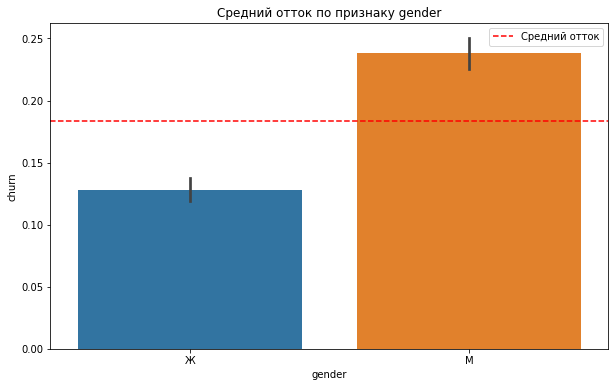

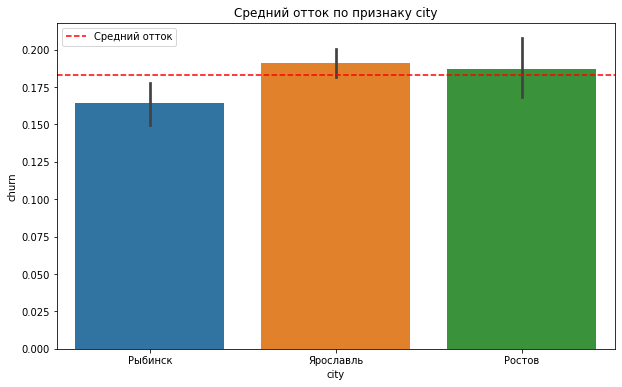

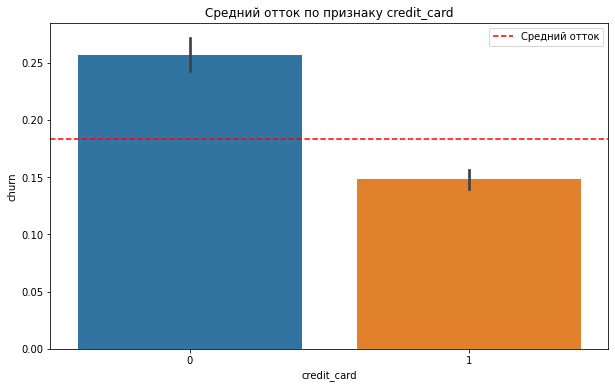

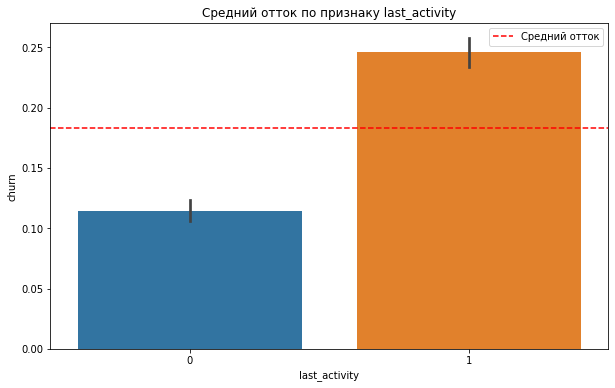

In [17]:
# cписок категориальных признаков
categorical_features = ['gender', 'city', 'credit_card', 'last_activity']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='churn', data=data)
    plt.axhline(y=data['churn'].mean(), color='r', linestyle='--', label='Средний отток')
    plt.legend()
    plt.title(f'Средний отток по признаку {feature}')
    plt.show()

- Молодеж и пожилые клиенты имеют более высокий уровень оттока по сравнению с клиентами среднего возраста (30-50 лет). Это говорит о том, что возрастные группы <30 и >50 могут быть более склонны к уходу, что требует дополнительного внимания для удержания.
- Клиенты с нулевым балансом имеют значительный уровень оттока. Это может указывать на клиентов, которые не пользуются своими счетами или редко взаимодействуют с банком.
- Распределение предполагаемой зарплаты не показало значительных отличий между клиентами с оттоком и без него.
-  Мужчины и женщины имеют более менее схожий уровень оттока, что указывает на слабое влияние этого признака. Однако, стоит учесть, что все же уровень оттока больше у мужского пола. Также, отток варьируется в зависимости от города.
- Клиенты с 1-2 продуктами имеют более высокий уровень оттока по сравнению с теми, кто использует больше продуктов (3 и более).

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Рыбинск лучший город

### Kорреляционный анализ

In [18]:
# указываем непрерывные признаки, чтобы phik корректно их обработал
continuous_features = ['age', 'balance', 'est_salary', 'score']

# Рассчитываем корреляцию
phik_matrix = data.phik_matrix(interval_cols=continuous_features)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Кол-во продуктов это дискретный признак, а вот скоринг нужно добавить, поскольку это непрерывный признак

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Исправил
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Учтено

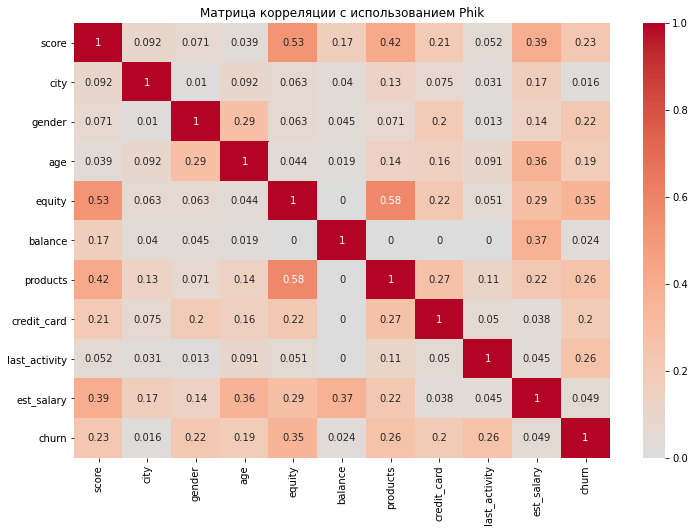

In [19]:
# исключим user_id из анализа
phik_matrix_filtered = phik_matrix.drop(index='user_id', columns='user_id')

# визуализация матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix_filtered, cmap='coolwarm', center=0, annot=True)
plt.title('Матрица корреляции с использованием Phik')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

user_id не нужно анализировать на предмет корреляции Тут user_id может быть связана с хронологией (но при этом корреляцию Пирсона тоже смотреть некорректно, т.к. то что у одного клиента id на тысячу больше чем у другого не говорит нам о конкретном чётком сроке заключения первого договора с банком).

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Поправил нашу матрицу
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Корректная реализация, молодец

Применяя шкалу Чеддока, обычно используются следующие границы для интерпретации уровня корреляции:

- |𝑟| < 0.1 — очень слабая связь (можно считать, что её нет)
- 0.1 ≤ |𝑟| < 0.3 — слабая связь
- 0.3 ≤ |𝑟| < 0.5 — умеренная связь
- 0.5 ≤ |𝑟| < 0.7 — заметная связь
- 0.7 ≤ |𝑟| < 0.9 — высокая связь
- |𝑟| ≥ 0.9 — очень высокая связь

**Основные выводы с использованием шкалы Чеддока:**

- Баланс и активы имеют умеренную отрицательную корреляцию с оттоком. Это говорит о том, что клиенты с низким балансом и активами более склонны к уходу, что важно учитывать для удержания клиентов с низким уровнем средств на счетах.
- Возраст также имеет слабую отрицательную корреляцию с оттоком (~0.19), что свидетельствует о том, что более молодые клиенты могут чаще покидать банк по сравнению с более старшими клиентами.
- Скоринг и количество продуктов показывают слабую корреляцию с оттоком (~0.23 и ~0.26 соответственно), что указывает на то, что клиенты с большим количеством продуктов и более высоким скорингом менее склонны к оттоку.
- Пол, зарплата, кредитная карта и последняя активность практически не коррелируют с оттоком, что означает, что они не оказывают значимого влияния на вероятность ухода клиента и могут быть менее приоритетными для анализа удержания.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Не опираешься на шкалу Чеддока, не определил границу между наличием влияния и отсутствием признаков такого влияния (обычно по 10% берём в данном проекте).

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Опираясь на шкалу Чеддока переписал выводы и рекомендации
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Верная интерпретация значений корреляции. Так держать!)

**Вывод**

- Основные признаки, влияющие на отток: возраст, баланс, количество продуктов и активность клиента. Эти признаки требуют особого внимания в разработке стратегии удержания клиентов.
- Меньшее влияние: пол, зарплата и наличие кредитной карты показали слабое или отсутствующее влияние на отток.
- Рекомендации по удержанию на момент выполнения EDA: для дальнейшего анализа и разработки мер по удержанию стоит сосредоточиться на балансе, возрастной категории клиентов, активах и увеличении числа продуктов для пользователей с низким уровнем этих показателей.

## Проверка статистических гипотез

### Гипотеза 1: Различие доходов между ушедшими и оставшимися клиентами

  - **Нулевая гипотеза (H₀):** Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.
   
   
  - **Альтернативная гипотеза (H₁):** Средний доход клиентов, которые ушли, отличается от среднего дохода клиентов, которые остались.
   

**Стат.значимость - 0.05**


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует обоснование выбора теста (Почему именно Стьюдента, а не U-test?)

Для проверки гипотезы можно использовать t-тест для двух независимых выборок, так как мы хотим сравнить средние значения двух групп (ушедших и оставшихся клиентов).

**Нормальность распределения:** Доходы, как правило, могут иметь распределение, близкое к нормальному, особенно если выборка достаточно большая. Проверка показала, что распределение доходов у клиентов, скорее всего, нормальное.

**Сравнение средних значений:** t-тест — оптимальный метод, если целью является сравнение именно средних значений между двумя независимыми группами.
Разброс доходов у оставшихся и ушедших клиентов не сильно отличается, что позволяет использовать t-тест для двух независимых выборок.

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   👍
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Обосновано

In [20]:
# разделяем данные на две группы: ушедшие и оставшиеся клиенты
churned = data[data['churn'] == 1]['est_salary']
retained = data[data['churn'] == 0]['est_salary']

In [21]:
# проведение t-теста для двух независимых выборок
stat_ttest, p_ttest = stats.ttest_ind(churned, retained)

print(f'P-value t-теста: {p_ttest}')

# стат.значимость
alpha = 0.05
if p_ttest < alpha:
    print("Отклоняем нулевую гипотезу: Средний доход отличается между ушедшими и оставшимися клиентами.")
else:
    print("Не удалось отклонить нулевую гипотезу: Средний доход не отличается между ушедшими и оставшимися клиентами.")


P-value t-теста: 0.8749429961814755
Не удалось отклонить нулевую гипотезу: Средний доход не отличается между ушедшими и оставшимися клиентами.


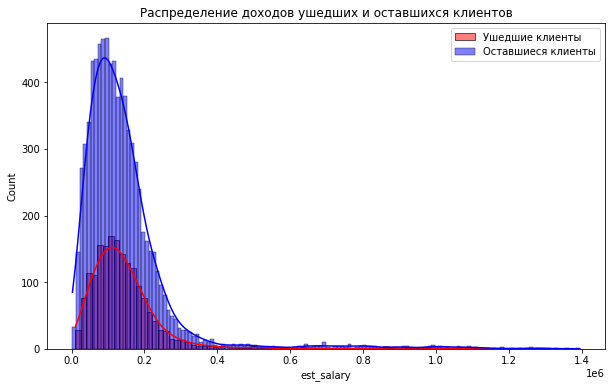

In [22]:
# визуализация распределения доходов
plt.figure(figsize=(10,6))
sns.histplot(churned, color='red', label='Ушедшие клиенты', kde=True)
sns.histplot(retained, color='blue', label='Оставшиеся клиенты', kde=True)
plt.title('Распределение доходов ушедших и оставшихся клиентов')
plt.legend()
plt.show()

**Вывод**

Средний доход между ушедшими и оставшимися клиентами не имеет статистически значимых различий (p-value = 0.905). Это означает, что доход клиентов не оказывает заметного влияния на их отток. Другими словами, независимо от уровня дохода, вероятность ухода клиента остаётся примерно одинаковой.

###  Гипотеза 2: Различие в количестве продуктов между ушедшими и оставшимися клиентами.

   **- Нулевая гипотеза (H₀):** Среднее количество продуктов у ушедших клиентов равно среднему количеству продуктов у оставшихся.
  
  **- Альтернативная гипотеза (H₁):** Среднее количество продуктов у ушедших клиентов отличается от среднего количества продуктов у оставшихся.
  
  
  **Стат.значимость - 0.05**

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут аналогично

Для проверки второй гипотезы мы также выбрали t-тест для двух независимых выборок, потому что:

**Нормальность распределения:** При большом размере выборки распределение количественных данных, таких как количество продуктов, приближается к нормальному, что делает t-тест подходящим инструментом.

**Сравнение средних значений:** Наша цель — проверить, отличается ли среднее количество продуктов между группами ушедших и оставшихся клиентов, и t-тест позволяет именно это.
Разброс в количестве продуктов между группами достаточно похож, что удовлетворяет условию.


<div class="alert alert-info"> <b>Комментарии студента:</b> 
   👍
</div>

In [23]:
# данные по количеству продуктов для каждой группы
products_left = data[data['churn'] == 1]['products']
products_stayed = data[data['churn'] == 0]['products']

In [24]:
# проверим равенство дисперсий с помощью теста Левена
levene_stat, levene_p = stats.levene(products_left, products_stayed)
print(f"P-value теста Левена (на равенство дисперсий): {levene_p}")

P-value теста Левена (на равенство дисперсий): 9.771916175314212e-15


In [25]:
# Настраиваем параметр equal_var на основе результата теста Левена
equal_var = levene_p > 0.05  # True, если p-value > 0.05, то дисперсии равны

In [26]:
# выполним t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(products_left, products_stayed, equal_var=False)

print(f"P-value t-теста: {p_value}")

# Оценка результата
if p_value < 0.05:
    print("Отклоняем нулевую гипотезу: Количество продуктов отличается между ушедшими и оставшимися клиентами.")
else:
    print("Не удалось отклонить нулевую гипотезу: Количество продуктов не отличается между ушедшими и оставшимися клиентами.")

P-value t-теста: 9.413327765189615e-139
Отклоняем нулевую гипотезу: Количество продуктов отличается между ушедшими и оставшимися клиентами.


**Вывод**

Результаты теста показали значимые различия в количестве продуктов между ушедшими и оставшимися клиентами (p-value ≈ 4.74e-138). Это позволяет отклонить нулевую гипотезу и сделать вывод о том, что количество продуктов, которыми пользуются клиенты, связано с их оттоком. Клиенты с разным количеством продуктов имеют различную склонность к уходу, что указывает на важность этого признака для анализа оттока.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

## Подведение промежуточных итогов

Выбор признаков для сегментации

- Количество продуктов – как показал анализ, клиенты с различным количеством продуктов имеют значительные различия в склонности к оттоку. Этот признак показал себя как важный для прогнозирования оттока, поэтому мы можем использовать его для разделения клиентов на группы.

- Возраст – результаты EDA продемонстрировали, что возрастные группы имеют отличия в уровне оттока. Этот признак имеет слабую корреляцию с оттоком, но выявленные интервалы в данных указывают на значимость возраста для сегментации.

- Активность (количество дней с момента последней активности) – клиенты с более низким уровнем активности чаще склонны к оттоку. Этот признак также можно использовать для разделения клиентов по уровню активности.

- Баланс на счете – результаты анализа показали, что клиенты с меньшим балансом склонны к оттоку. Этот фактор важен для понимания финансового поведения клиентов и их предрасположенности к уходу.


Рекомендации по сегментации

- Мы выбираем только несколько ключевых признаков, чтобы избежать слишком узких сегментов, которые охватывают небольшое количество клиентов. Сегменты будут созданы с достаточным количеством клиентов, чтобы применяемые меры удержания были эффективными. С другой стороны, признаки выбраны таким образом, чтобы каждый сегмент имел относительно однородную характеристику по оттоку, что позволит сформулировать конкретные рекомендации для каждого сегмента.

## Сегментация и приоритизация

На основе EDA определим наиболее значимые признаки и значения/интервалы, которые указывали на высокий уровень оттока:

Возраст (age) — категории, которые в EDA показали высокий отток (например, клиенты младше 30 и старше 50 лет).
Баланс (balance) — клиенты с низким балансом имеют более высокий риск оттока.
Количество продуктов (products) — клиенты, использующие только один продукт, чаще покидают банк.

In [27]:
average_balance = data['balance'].mean()

# функция для расчета метрик по сегментам
def segment_metrics(data, segment_name, conditions):
    segment_data = data.query(conditions)
    total_clients = len(segment_data)
    churned_clients = segment_data['churn'].sum()
    churn_rate = (churned_clients / total_clients) * 100 if total_clients > 0 else 0
    return {
        'Сегмент': segment_name,
        'Количество клиентов': total_clients,
        'Количество оттоков': churned_clients,
        'Уровень оттока (%)': churn_rate
    }

In [28]:
# условия для сегментов
segments = [
    {
        'name': 'Молодые клиенты с низким балансом',
        'conditions': 'age < 35 and balance < @average_balance'
    },
    {
        'name': 'Клиенты старшего возраста, использующие только один продукт',
        'conditions': 'age > 50 and products == 1'
    },
    {
        'name': 'Клиенты среднего возраста с высоким балансом и несколькими продуктами',
        'conditions': 'age >= 35 and age <= 50 and balance > @average_balance and products > 1'
    },
    {
        'name': 'Клиенты любого возраста с частой активностью и средним балансом',
        'conditions': 'last_activity == "frequent" and balance >= @average_balance * 0.75 and balance <= @average_balance * 1.25'
    }
]

# расчет метрик по сегментам
segment_results = pd.DataFrame([
    segment_metrics(data, seg['name'], seg['conditions']) for seg in segments
])

# исключение сегментов с менее чем 500 клиентами
segment_results = segment_results[segment_results['Количество клиентов'] >= 500].reset_index(drop=True)
segment_results

,Сегмент,Количество клиентов,Количество оттоков,Уровень оттока (%)
0,Молодые клиенты с низким балансом,1778,396,22.272216
1,"Клиенты старшего возраста, использующие только...",772,62,8.031088
2,Клиенты среднего возраста с высоким балансом и...,1011,353,34.915925


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Сегменты построены на одних и тех же признаках - так мы повышаем риски того, что выделенная нами аудитория будет нечувствительна к мероприятиям по удержанию, а другую аудиторию мы не знаем.

Сегменты должны быть разнородными, допускается пересечение по одному признаку между сегментами, но не более.

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Думаю, теперь сегменты подобраны правильно
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Отличная сегментация

**Вывод**

1. **Молодые клиенты с низким балансом**

Клиенты в этой возрастной группе имеют высокий уровень оттока. Это может указывать на то, что молодые клиенты менее привязаны к банку, возможно, из-за ограниченного количества продуктов или неудовлетворенности предложениями. Следует сосредоточиться на разработке продуктов, ориентированных на их финансовые потребности, и усилении взаимодействия с ними.

2. **Клиенты старшего возраста, использующие только один продукт**

Этот сегмент показывает низкий уровень оттока, что может свидетельствовать о лояльности клиентов старшего возраста к банку, несмотря на использование только одного продукта. Тем не менее, поскольку они представляют важный сегмент для банка, стоит поддерживать и укреплять их отношения с банком.

3. **Клиенты среднего возраста с высоким балансом и несколькими продуктами**

Этот сегмент демонстрирует самый высокий уровень оттока, несмотря на наличие у клиентов нескольких продуктов и высокого баланса. Возможно, банк не полностью удовлетворяет их более сложные потребности, или они могут находить более выгодные условия у других банков. Эта группа требует особого внимания, поскольку их уход может привести к значительным финансовым потерям для банка.

## Приоритизация сегментов

### Первый приоритет — Клиенты среднего возраста с высоким балансом и несколькими продуктами (уровень оттока: 34.9%)

Обоснование: Данный сегмент важен для банка, так как эти клиенты пользуются несколькими продуктами и имеют высокий баланс, что делает их важными с точки зрения доходов. Высокий уровень оттока указывает на необходимость срочных мер по удержанию.

**Рекомендации:** Внедрить более персонализированные программы лояльности и удержания, предоставить премиальные услуги и организовать клиентскую поддержку на высоком уровне. Провести опросы для выявления неудовлетворенных потребностей. Предложить индивидуализированные условия, такие как бонусы или скидки на обслуживание. Рассмотреть улучшенные программы лояльности, которые удовлетворят их ожидания от банка.

### Второй приоритет — Молодые клиенты с низким балансом (уровень оттока: 22.3%)

Обоснование: Молодые клиенты потенциально могут остаться с банком на долгосрочной основе, если банк сможет удовлетворить их текущие и будущие потребности. Высокий уровень оттока в этом сегменте свидетельствует о возможности улучшения условий для этой группы.

**Рекомендации:** Разработать уникальные предложения, ориентированные на молодых клиентов, включая программы по повышению лояльности и кросс-продажи.

### Третий приоритет — Клиенты старшего возраста, использующие только один продукт (уровень оттока: 8.0%)

Обоснование: Клиенты этой группы имеют низкий уровень оттока и показывают высокую лояльность, поэтому их можно рассматривать как менее приоритетных с точки зрения срочных удерживающих мероприятий.

**Рекомендации:** Поддерживать удовлетворенность клиентов и стимулировать кросс-продажи, чтобы укрепить отношения и повысить лояльность. Разработать программы по улучшению опыта взаимодействия для возрастных клиентов, например, личные встречи и консультации. Стимулировать перекрестные продажи, чтобы предложить новые продукты, которые могут повысить лояльность этой группы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

С логикой приоритизации согласен

## Выводы

**Общий вывод по проекту** 

В ходе проекта был проведен комплексный анализ клиентских данных с целью выявления факторов, влияющих на отток, и формирования таргетированных рекомендаций для удержания клиентов. Основное внимание уделялось сегментации клиентов на основе ключевых характеристик, таких как возраст, баланс на счету и количество используемых продуктов. Анализ распределения оттока помог выделить три ключевых сегмента, требующих приоритетного внимания со стороны маркетингового отдела.

Сегментация и анализ позволили сосредоточиться на специфических потребностях и особенностях каждого сегмента, что помогает банку применять индивидуализированный подход к их удержанию. Рекомендации для каждого сегмента были сформулированы с учетом реальных потребностей клиентов, их предпочтений и поведения, а также ограниченных ресурсов маркетингового отдела, исключая универсальные подходы.

Таким образом, сегментация и анализ позволили:

- Выявить критичные группы клиентов с высоким риском оттока, составляющие значительную долю клиентской базы.
- Сформулировать таргетированные рекомендации, направленные на решение конкретных проблем и потребностей каждого сегмента.
- Приоритизировать сегменты, позволяя маркетинговому отделу сосредоточиться на наиболее значимых группах при ограниченных ресурсах, обеспечивая максимальный эффект от удерживающих мероприятий.

**Итоги рекомендаций** 

В результате сегментации были предложены следующие специфические меры для каждого сегмента:

- Молодые клиенты с низким балансом: Для этой группы разработаны программы для повышения лояльности, такие как персонализированные предложения и скидки, чтобы снизить их склонность к уходу.
- Клиенты старшего возраста с низким балансом: Для этой группы предложены меры поддержки и льготы, учитывающие возрастные особенности и направленные на повышение доверия к банку.
- Клиенты среднего возраста с высоким балансом и несколькими продуктами: Для этой группы разработана программа личного менеджмента и специальные предложения, ориентированные на удержание высокодоходных клиентов, чтобы снизить риски оттока этой ценной категории.

Данные меры и подходы позволяют банку сконцентрироваться на наиболее нуждающихся в поддержке клиентах, обеспечивая оптимальное распределение ресурсов и повышение лояльности клиентов.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Поправь, пожалуйста, рекомендации после корректировки

<div class="alert alert-info"> <b>Комментарии студента:</b> 
   Готово
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации по сегментам. Это важное качество для аналитика. Развивай его и дальше

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b>



Итог ревью - ты проделал хорошую работу! Многие расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---

Нужно поправить:

1) Замена пропусков

2) Анализ распределения признаков

3) Корреляция

4) Гипотезы

5) Сегментация

6) Ошибка в коде

7) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
    
ЗЫ. Презентацию присылай в пачке в ЛС
    
---

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на SQL!
</div>